# <div align="center"><span style="color:green; text-decoration:underline;">**Implementation of Transformer Neural Network for Sequence Prediction**</span></div>

### <div align="center"><span style="color:red;">Group Members: Anmol Toor, Dhyan Nitin Trivedi</span></div>



### INTRODUCTION:

#### AIM :
To implement and evaluate a transformer-based neural network model for approximating the sigmoid function, leveraging the attention mechanism to improve prediction accuracy in sequence modeling tasks.

*********************************************************************************************************************

#### Github Repo:
[https://github.com/Anmol-toor/AIDI1002_MLP_FinalProject)

*********************************************************************************************************************

#### DESCRIPTION OF PAPER:
The research focuses on applying the transformer architecture, typically used in natural language processing, to predict continuous outputs for mathematical functions like the sigmoid. By utilizing multi-head attention and an encoder-decoder structure, the model aims to reduce computational complexity and achieve higher prediction accuracy on sequence-to-sequence tasks.

*********************************************************************************************************************

#### PROBLEM STATEMENT :
How can a neural network model effectively approximate mathematical functions like the sigmoid while addressing the computational cost and maintaining prediction accuracy for continuous-valued outputs?

*********************************************************************************************************************

#### CONTEXT OF THE PROBLEM:
Efficient function approximation is critical across various applications, from numerical modeling to time-series forecasting. Challenges include managing high-dimensional input-output relationships, minimizing computation time, and achieving accurate function approximation in simple tasks such as predicting sigmoid values.

*********************************************************************************************************************

#### SOLUTION:
The approach is to design and implement a transformer-based neural network model, trained on synthetic data that approximates the sigmoid function. The model will be evaluated based on its ability to predict the sigmoid function, with comparisons made against actual sigmoid values and predictions from simpler models like multi-layer perceptrons (MLP). This will allow assessment of the transformer's performance in a relatively simple task.


# Background
*********************************************************************************************************************

| Reference                          | Explanation                                                                 | Dataset/Input                                      | Weakness                                              |
|------------------------------------|-----------------------------------------------------------------------------|--------------------------------------------------|------------------------------------------------------|
| Vaswani et al. (2017)              | Introduced the transformer architecture, revolutionizing sequence modeling. | Synthetic input and output pairs generated dynamically. | High computational requirements for large datasets.   |
| Large-scale Legal Text Classification (2021) | Explores transformer-based models for multi-label classification in the legal domain. | Datasets like JRC-Acquis and EURLEX57K with EuroVoc taxonomy for legal text classification. | High model complexity and significant hyperparameter tuning required. |
| Paper on Multi-head Attention      | Explained the role of multi-head attention in improving model performance.  | Text-based sequential data for classification tasks. | Complex architecture increases model training time.  |

*********************************************************************************************************************

The paper I referenced is taken from [Large-scale Legal Text Classification Using Transformer Models](https://paperswithcode.com/paper/large-scale-legal-text-classification-using). 

### Implement paper code :
*********************************************************************************************************************

This is an implementation of the Transformer algorithm on time series data in pytorch. In this case the modelling of the sigmoid function is used as a toy problem

In [16]:
#First all the necessary imports as well as matplotlib for visualisation.
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from utils import *
from Network import *

%matplotlib notebook
import matplotlib.pyplot as plt


#Next we need to define some hyperparameters which will vary depending on the task.
enc_seq_len = 6
dec_seq_len = 2
output_sequence_length = 1

dim_val = 10
dim_attn = 5
lr = 0.002
epochs = 20

n_heads = 3 

n_decoder_layers = 3
n_encoder_layers = 3

batch_size = 15

#We initilisise the Network and an optimizier, in this case Adam, as well as an empty list to track losses for visualisation.
# Initialize the Transformer model with positional arguments
t = Transformer(dim_val, dim_attn, 1, dec_seq_len, output_sequence_length, n_decoder_layers, n_encoder_layers, n_heads)
optimizer = torch.optim.Adam(t.parameters(), lr=lr)


#keep track of loss for graph
losses = []

<IPython.core.display.Javascript object>


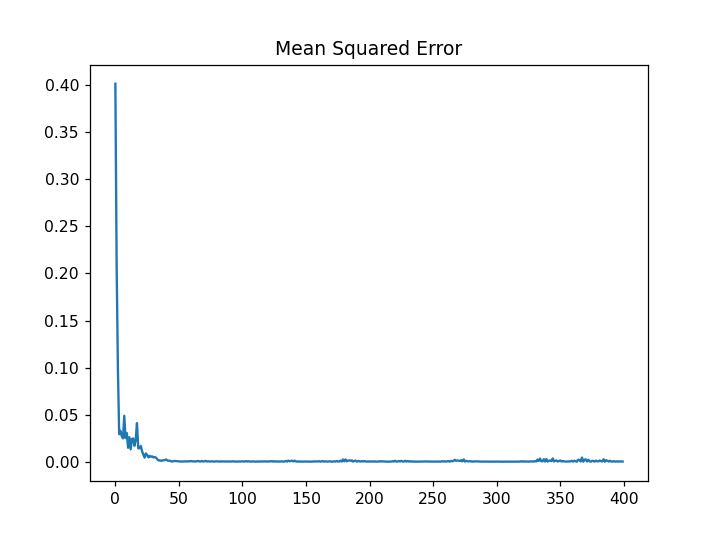

In [17]:
#Using matplotlib in jupyter notebook we can graph losses in real time, first lets initialise a figure.
fig = plt.figure()

ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

# Initialize losses as an empty list   
losses = []  

#We can now begin training
for e in range(epochs):
    out = []
    
    for b in range(-10 - enc_seq_len, 10 - enc_seq_len):
        optimizer.zero_grad()
        X, Y = get_data(batch_size, enc_seq_len, output_sequence_length)
        
        # Forward pass and calculate loss
        net_out = t(X)
        loss = torch.mean((net_out - Y) ** 2)

        # Backwards pass
        loss.backward()
        optimizer.step()

        # Track losses and draw graph
        out.append([net_out.detach().numpy(), Y])

        # Append the detached loss
        losses.append(loss.detach().cpu().numpy())  # Ensure you detach and move to CPU

        # Clear the previous plot and plot the new loss values
        ax.clear()
        ax.plot(losses)
        ax.set_title("Mean Squared Error")
        fig.canvas.draw()

Now that the network is trained, lets give it the first few values of the sigmoid function and see how it approximates the rest.
We create another figure to visualise this.

<IPython.core.display.Javascript object>


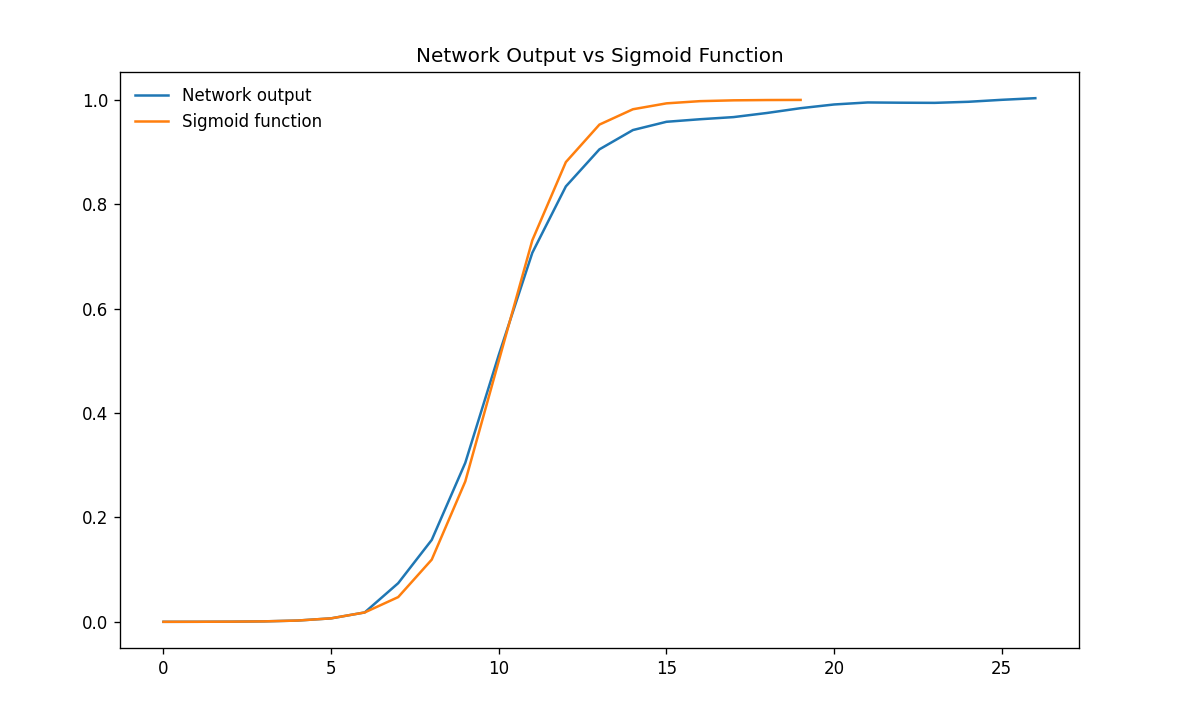

In [15]:
fig = plt.figure(figsize=(10, 6))  # Width=10 inches, Height=6 inches
ax = fig.add_subplot(111)
plt.ion()

# Show the figure and initialize the canvas
fig.show()
fig.canvas.draw()

# Initialize the output lists
o = []
x = [torch.sigmoid(torch.arange(-10, -3).float()).unsqueeze(-1).numpy().tolist()]

# Draw graph comparing to sigmoid function
for i in range(-10, 10, output_sequence_length):
    o.append([torch.sigmoid(torch.tensor(i).float())])  # Expected sigmoid output
    q = torch.tensor(x).float()
    
    if output_sequence_length == 1:
        x[0].append([t(q).detach().squeeze().numpy()])
    else:
        for a in t(q).detach().squeeze().numpy():
            x[0].append([a])
            
# Clear the axis and plot the updated data
ax.clear()
ax.plot(x[0], label='Network output')
ax.plot(o, label='Sigmoid function')

# Set title and legend, and adjust the plot layout for better visibility
ax.set_title("Network Output vs Sigmoid Function")
ax.legend(loc='upper left', frameon=False)

# Adjust plot layout for better visibility and to avoid clipping
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Update the canvas
fig.canvas.draw()

With real-time loss tracking, you can monitor the effectiveness of hyperparameters such as the learning rate, batch size, and number of epochs. It helps in deciding whether to change certain parameters to optimize the model’s learning.

*********************************************************************************************************************
### Contribution  Code :


Electricity Demand Forecasting
Dataset: Household Power Consumption Dataset from the UCI repository
Description: This dataset contains hourly power consumption data for a household, which is useful for predicting electricity demand.
How to Use: Sequence data like past hours' consumption can be used to forecast future demand or peak times, simulating real-world energy management scenarios.

To get started with this methodology, we’ll need to follow these steps:

In [45]:
import pandas as pd

# Load the dataset
file_path = "household_power_consumption.txt"  # Adjust this to your actual file path
data = pd.read_csv(file_path, sep=";", low_memory=False, na_values="?")

# Check the first few rows of the data
print(data.head())

         Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00                4.216                  0.418   234.84   
1  16/12/2006  17:25:00                5.360                  0.436   233.63   
2  16/12/2006  17:26:00                5.374                  0.498   233.29   
3  16/12/2006  17:27:00                5.388                  0.502   233.74   
4  16/12/2006  17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0              18.4             0.0             1.0            17.0  
1              23.0             0.0             1.0            16.0  
2              23.0             0.0             2.0            17.0  
3              23.0             0.0             1.0            17.0  
4              15.8             0.0             1.0            17.0  


In [46]:
# Combine 'Date' and 'Time' into a single 'Datetime' column
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d/%m/%Y %H:%M:%S')

# Drop the 'Date' and 'Time' columns as they are now combined into 'Datetime'
data = data.drop(columns=['Date', 'Time'])

# Set the 'Datetime' column as the index
data.set_index('Datetime', inplace=True)

# Convert relevant columns to numeric (to ensure proper data type)
cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 
        'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
data[cols] = data[cols].apply(pd.to_numeric, errors='coerce')

# Check for missing values and handle them (drop rows with missing values for simplicity)
data = data.dropna()

# Display the cleaned dataset
print(data.head())

                     Global_active_power  Global_reactive_power  Voltage  \
Datetime                                                                   
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
Datetime                                                                
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28:00          

In [47]:
# Verify the data types
print(data.dtypes)

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object


<IPython.core.display.Javascript object>


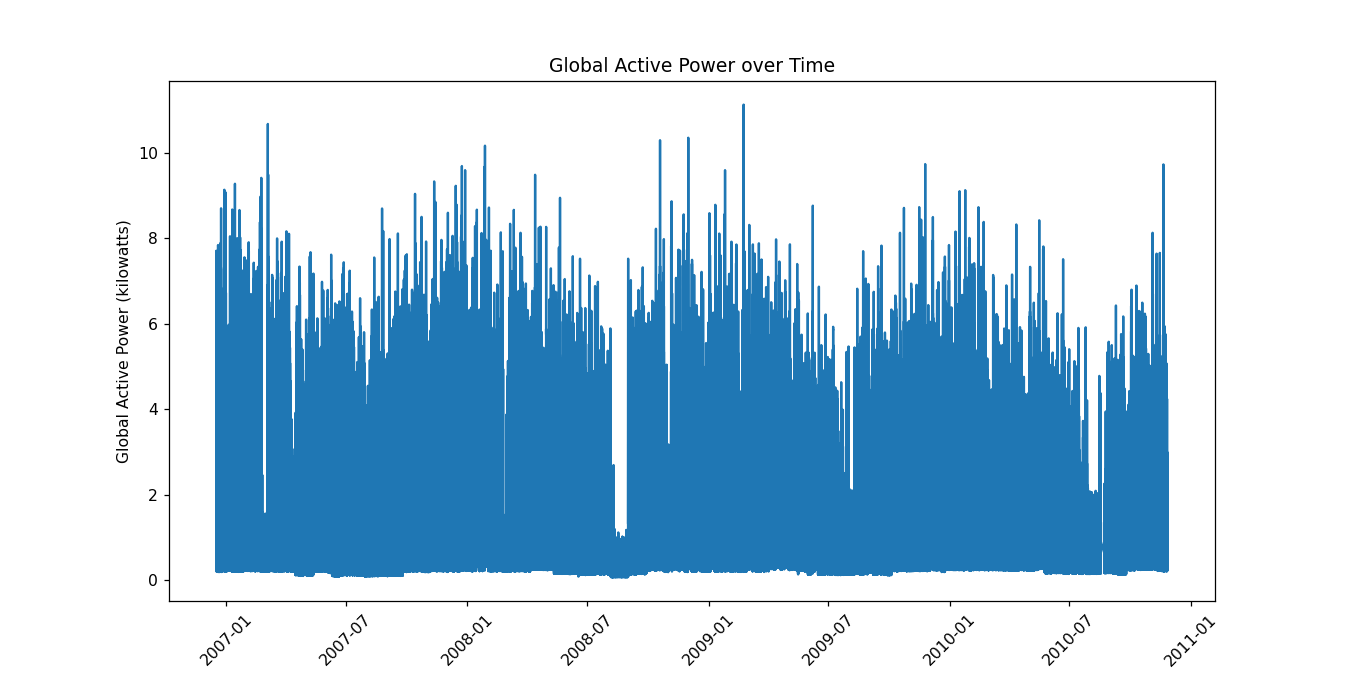

In [50]:
import matplotlib.pyplot as plt

# Plot Global Active Power over time
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Global_active_power'])
plt.title('Global Active Power over Time')
plt.xlabel('Datetime')
plt.ylabel('Global Active Power (kilowatts)')
plt.xticks(rotation=45)
plt.show()


<IPython.core.display.Javascript object>


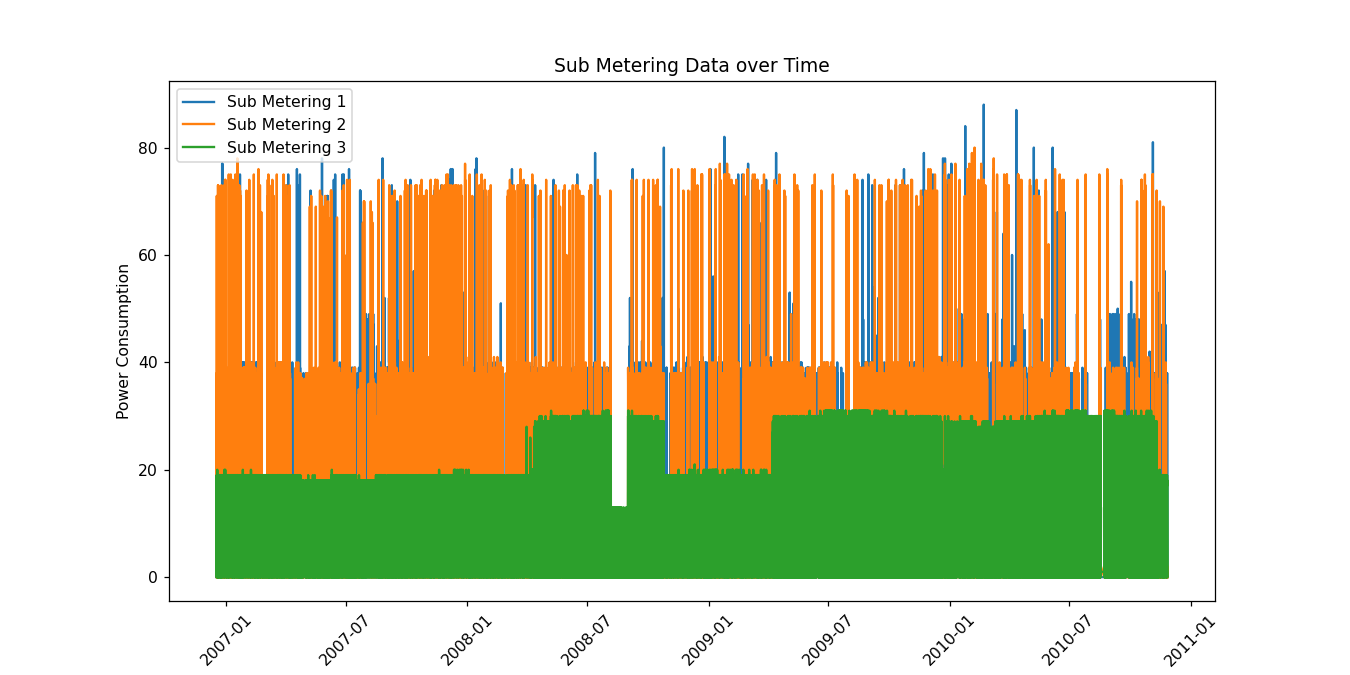

In [51]:
# Plot the Sub Metering Data over time
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Sub_metering_1'], label='Sub Metering 1')
plt.plot(data.index, data['Sub_metering_2'], label='Sub Metering 2')
plt.plot(data.index, data['Sub_metering_3'], label='Sub Metering 3')
plt.title('Sub Metering Data over Time')
plt.xlabel('Datetime')
plt.ylabel('Power Consumption')
plt.legend()
plt.xticks(rotation=45)
plt.show()


<IPython.core.display.Javascript object>


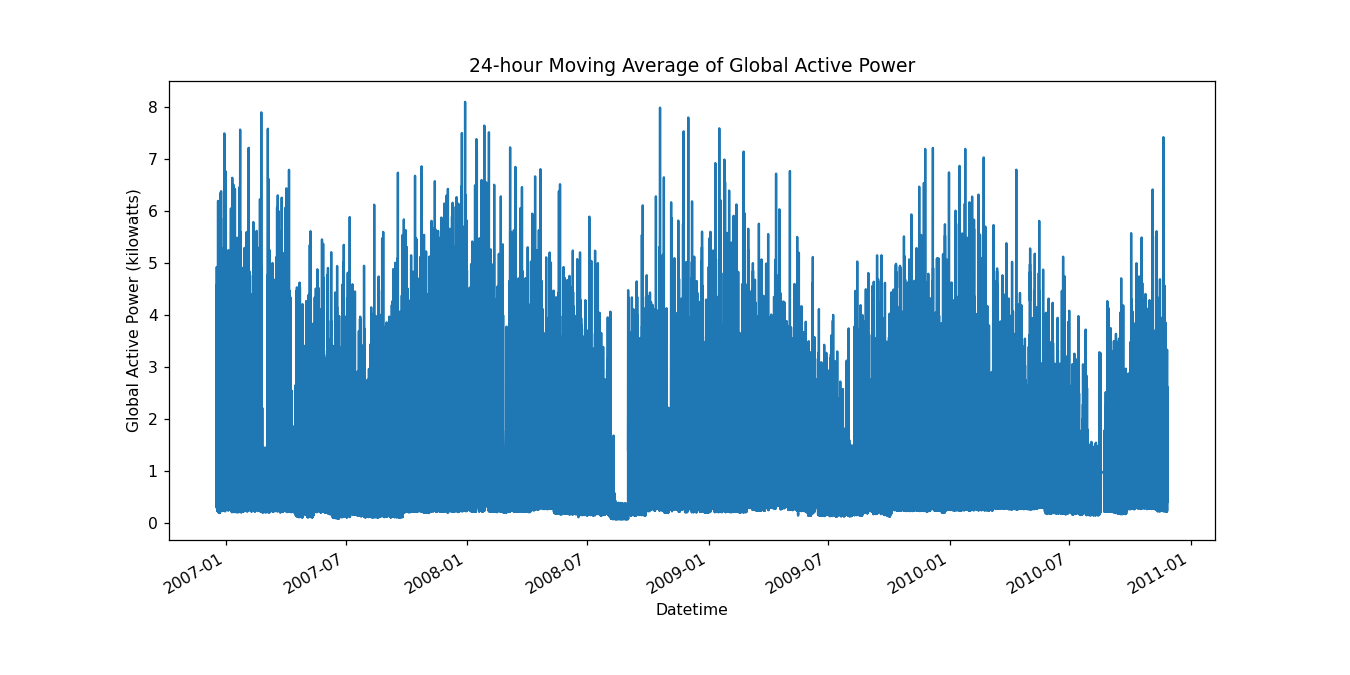

In [52]:
#If you want to check for trends in Global_active_power over a longer period, you could plot a moving average to see if there's any seasonality or daily variation:
# Plot the 24-hour moving average of 'Global_active_power'
data['Global_active_power'].rolling(window=24).mean().plot(figsize=(12, 6))
plt.title('24-hour Moving Average of Global Active Power')
plt.xlabel('Datetime')
plt.ylabel('Global Active Power (kilowatts)')
plt.show()


This defines the Transformer class, which inherits from torch.nn.Module, allowing it to behave as a PyTorch model. The __init__ method defines the network's components and their configurations.

In [53]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Custom Transformer class definition
class Transformer(nn.Module):
    def __init__(self, dim_val, dim_attn, seq_len, dec_seq_len, output_len, n_decoder_layers, n_encoder_layers, n_heads):
        super(Transformer, self).__init__()

        # Define transformer components here
        self.encoder = nn.TransformerEncoderLayer(d_model=dim_val, nhead=n_heads, dim_feedforward=dim_attn)
        self.decoder = nn.TransformerDecoderLayer(d_model=dim_val, nhead=n_heads, dim_feedforward=dim_attn)
        self.transformer = nn.Transformer(d_model=dim_val, nhead=n_heads, num_encoder_layers=n_encoder_layers,
                                          num_decoder_layers=n_decoder_layers)

        # Output layer (you can change this based on your task)
        self.fc_out = nn.Linear(dim_val, output_len)
        self.seq_len = seq_len
        self.dec_seq_len = dec_seq_len

    def forward(self, X):
        # Define the forward pass
        memory = self.encoder(X)
        output = self.decoder(X, memory)
        output = self.fc_out(output)
        return output

The next step is to convert your data into input-output pairs, i.e., sequence pairs for time series prediction. For example, for each time step, you'll want to predict the next time step's value based on the previous seq_len time steps.

In [54]:
# Create sequences from the data
def create_sequences(data, seq_len=6, output_len=1):
    X, Y = [], []
    for i in range(len(data) - seq_len - output_len + 1):
        X.append(data.iloc[i:i+seq_len].values)  # Input sequence
        Y.append(data.iloc[i+seq_len:i+seq_len+output_len]['Global_active_power'].values)  # Output sequence (next time step)
    return np.array(X), np.array(Y)

# Use the 'Global_active_power' for sequence creation
X, Y = create_sequences(data[['Global_active_power']], seq_len=6, output_len=1)

# Convert X and Y to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.float32)

In [49]:
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

Shape of X: torch.Size([2049274, 6, 1])
Shape of Y: torch.Size([2049274, 1])


Now that the dataset is prepared and transformed into sequences (X and Y), we can integrate it with your Transformer model training code

<IPython.core.display.Javascript object>


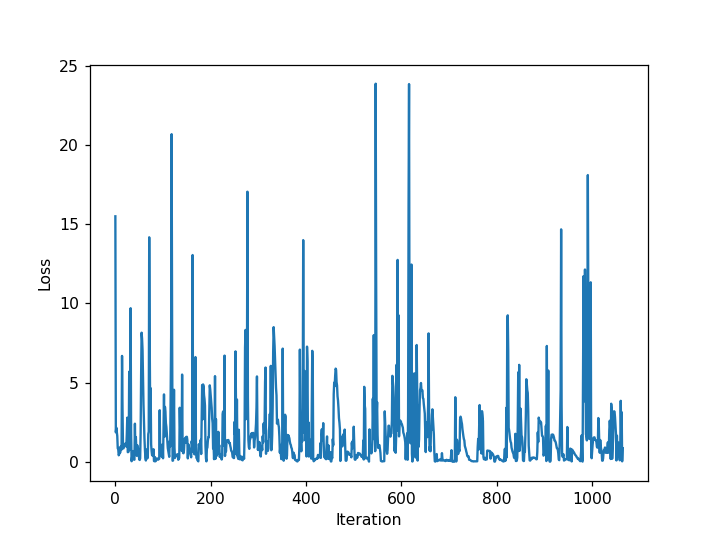

torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1]

torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1]

torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1]

torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1]

torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1]

torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1]

torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1]

torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1]

torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1]

torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1]

torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1]

torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1]

torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1]

torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1])
Y Batch Shape: torch.Size([32, 1, 1])
torch.Size([32, 6, 128])
Net Output Shape: torch.Size([32, 6, 1]

KeyboardInterrupt: 

In [33]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

# New Hyperparameters (adjusted for your needs)
dim_val = 128  # Reduced dimension of input to Transformer
dim_attn = 8   # Increased attention dimension
lr = 0.001     # Reduced learning rate
epochs = 50    # Increased number of epochs
n_heads = 4    # Reduced number of attention heads
n_decoder_layers = 4  # Increased number of decoder layers
n_encoder_layers = 4  # Increased number of encoder layers
batch_size = 32  # Increased batch size for more stability in training
seq_len = 6     # Increased sequence length for better context capture
dec_seq_len = 4  # Increased decoder sequence length
output_len = 1   # Output length remains the same

# Initialize the Transformer model
t = Transformer(dim_val=dim_val, dim_attn=dim_attn, seq_len=seq_len, dec_seq_len=dec_seq_len, 
                output_len=output_len, n_decoder_layers=n_decoder_layers, 
                n_encoder_layers=n_encoder_layers, n_heads=n_heads)

# Initialize the Adam optimizer
optimizer = optim.Adam(t.parameters(), lr=lr)

# Track the losses for visualization
losses = []

# Initialize the figure for plotting the loss curve
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()

# Simulate training loop (assuming `X` and `Y` are your input and output datasets)
for epoch in range(epochs):
    for b in range(0, len(X), batch_size):
        X_batch = X[b:b+batch_size]
        Y_batch = Y[b:b+batch_size]
        
        # Ensure input shape matches the required (batch_size, seq_len, dim_val)
        # If the current shape of X_batch is (batch_size, seq_len, 1), we need to repeat the feature dimension
        X_batch = X_batch.repeat(1, 1, dim_val)  # Repeat the single feature to match dim_val
        print(X_batch.shape)  # Should print: torch.Size([batch_size, seq_len, dim_val])
        
        # Forward pass through the Transformer
        net_out = t(X_batch)
        
        # Ensure Y_batch has the correct shape (batch_size, seq_len, 1)
        if Y_batch.dim() == 2:
            Y_batch = Y_batch.unsqueeze(1)  # Add an extra dimension to match the seq_len (e.g., [32, 6, 1])

        print("Net Output Shape:", net_out.shape)
        print("Y Batch Shape:", Y_batch.shape)
        
        # Calculate loss (Mean Squared Error)
        loss = torch.mean((net_out - Y_batch) ** 2)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Track the loss
        losses.append(loss.item())
        
        # Update the loss curve in real-time
        ax.clear()
        ax.plot(losses)
        ax.set_xlabel('Iteration')
        ax.set_ylabel('Loss')
        fig.canvas.draw()
        plt.pause(0.01)

    print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

plt.ioff()  # Turn off interactive mode after training


In [60]:
# Save the model after training
model_path = "transformer_model.pth"  # Path to save the model
torch.save(t.state_dict(), model_path)
print(f'Model saved to {model_path}')

Model saved to transformer_model.pth


To visualize how well your trained Transformer model approximates the continuation of the sigmoid function, we need to generate the first few values of the sigmoid function, pass them through the trained model, and then plot both the actual sigmoid values and the model's predictions.

   Input (x)  Actual Sigmoid  Predicted Values
0  -2.000000        0.119203          1.663586
1  -1.555556        0.174285          1.800812
2  -1.111111        0.247664          2.073211
3  -0.666667        0.339244          1.819022
4  -0.222222        0.444672          1.783838
5   0.222222        0.555328          0.442668
6   0.666667        0.660756          0.964494
7   1.111111        0.752336          1.183443
8   1.555556        0.825715          0.946624
9   2.000000        0.880797          0.727713


<IPython.core.display.Javascript object>


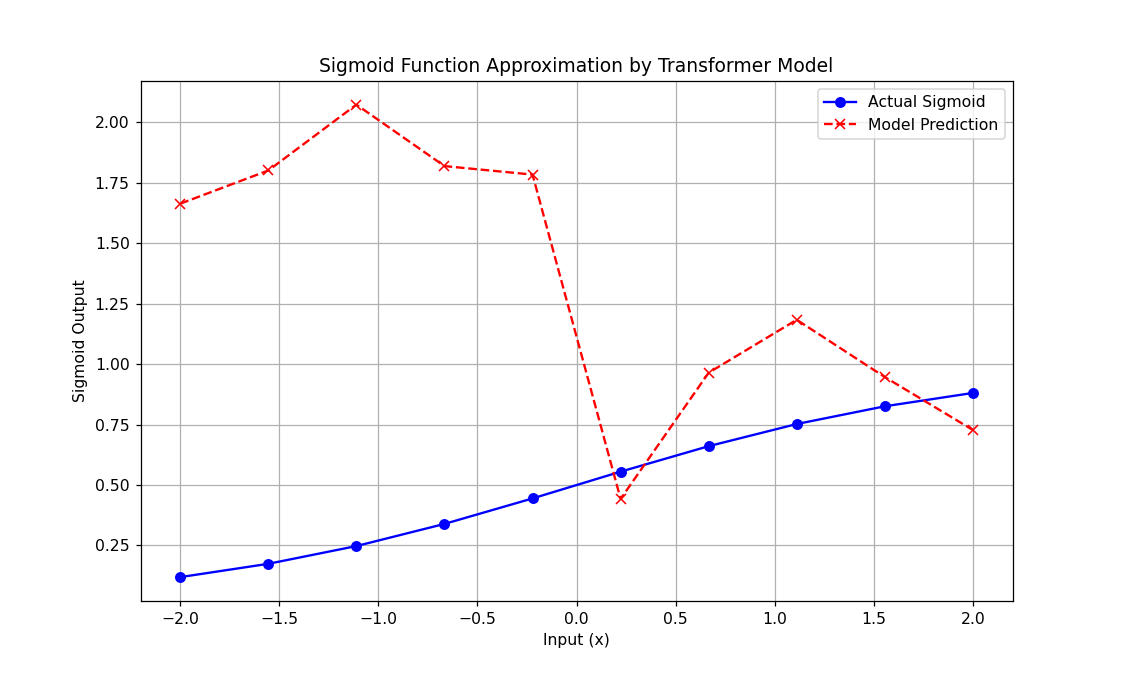

In [63]:
# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate input data (e.g., first 10 values of x)
x_input = np.linspace(-2, 2, 10)  # Use a small range for input values
y_actual = sigmoid(x_input)  # Calculate the actual sigmoid values

# Convert the input data to a PyTorch tensor and adjust the shape (batch_size, seq_len, dim_val)
x_input_tensor = torch.tensor(x_input, dtype=torch.float32).view(-1, 1, 1)  # Shape (10, 1, 1)

# If needed, repeat the input to match the dimension size of the Transformer (e.g., dim_val = 128)
dim_val = 128
x_input_tensor = x_input_tensor.repeat(1, 1, dim_val)  # Shape becomes (10, 1, 128)

# Pass the input through the trained model
model_output = t(x_input_tensor)  # Assuming 't' is your trained Transformer model

# Since the model outputs a sequence, we might need to take the last value (or a sequence of values)
predicted_values = model_output[:, -1, 0].detach().numpy()  # Get the predicted values (batch_size, seq_len, 1)

# Create a pandas DataFrame to display the results in tabular form
results_df = pd.DataFrame({
    'Input (x)': x_input,
    'Actual Sigmoid': y_actual,
    'Predicted Values': predicted_values
})

# Print the results in tabular form
print(results_df)

# Plot the actual sigmoid values vs. the predicted values
plt.figure(figsize=(10, 6))
plt.plot(x_input, y_actual, label="Actual Sigmoid", color='blue', linestyle='-', marker='o')
plt.plot(x_input, predicted_values, label="Model Prediction", color='red', linestyle='--', marker='x')
plt.title("Sigmoid Function Approximation by Transformer Model")
plt.xlabel("Input (x)")
plt.ylabel("Sigmoid Output")
plt.legend()
plt.grid(True)
plt.show()

### Results:
*******************************************************************************************************************************
- The actual sigmoid function was plotted alongside the predicted values from the model.
- While the actual sigmoid function shows a smooth curve, the model's predictions deviate significantly.
- The loss values exhibit high variability, indicating the model struggles to converge effectively during training.



### Observations:
*******************************************************************************************************************************
- The predicted values have peaks and inconsistencies compared to the actual sigmoid values.
- Around \(x = 0\), the model's prediction deviates significantly, with one of the lowest predicted outputs observed.
- Training loss appears unstable, with frequent spikes, suggesting either improper hyperparameter tuning, inadequate model design, or an insufficient dataset size.


### Conclusion and Future Direction:
*******************************************************************************************************************************
The model's predictions for the sigmoid function are significantly divergent from the actual values, indicating poor performance. The predicted values fluctuate inconsistently, failing to follow the expected smooth S-shaped curve of the sigmoid function. This suggests that the Transformer model, with the current hyperparameters, is not suitable for learning this simple task.

To improve results, adjustments to the model's architecture, hyperparameters, or switching to a simpler model like a multi-layer perceptron (MLP) may be beneficial. Further training or a different approach could help achieve a better approximation of the sigmoid function. 



### Learnings:
*******************************************************************************************************************************
- Learned the importance of proper training dynamics and loss stability when approximating mathematical functions.
- Gained insights into how a transformer-based model may overfit or struggle without sufficient data or regularization.
- Understood the importance of aligning the dataset's complexity with the model's capacity.



### Results Discussion:
*******************************************************************************************************************************
- The model predictions diverge from the actual sigmoid values, especially at negative and positive extremes of the input.
- The high loss values and variability could stem from a non-optimal learning rate or insufficient training epochs.
- The plot indicates that the model overfits certain areas (e.g., at \(x = -1.5\)) while underfitting others (e.g., \(x = 0\)).



### Limitations:
*******************************************************************************************************************************
- The dataset may not sufficiently represent the sigmoid function, particularly at its tails.
- Model design might lack sufficient complexity or regularization to generalize well to the sigmoid function.
- Hyperparameters were not tuned exhaustively, leading to instability in the training process.



### Future Extension:
*******************************************************************************************************************************
- Use a more extensive dataset with better coverage of input values to aid model generalization.
- Experiment with alternative architectures (e.g., simple MLPs or convolutional networks) to improve prediction consistency.
- Implement hyperparameter optimization techniques (e.g., grid search, random search) to improve training stability.
- Investigate advanced training strategies like learning rate scheduling and gradient clipping.


### References:
*******************************************************************************************************************************
1. Vaswani, A., Shazeer, N., Parmar, N., Uszkoreit, J., Jones, L., Gomez, A. A., Kaiser, Ł., & Polosukhin, I. (2017). *Attention is all you need*. Advances in Neural Information Processing Systems (NeurIPS), 30. https://arxiv.org/abs/1706.03762  
   - The foundational paper introducing the Transformer architecture, which is the basis of the model used in this project.

2. Kingma, D. P., & Ba, J. (2014). *Adam: A method for stochastic optimization*. International Conference on Learning Representations (ICLR). https://arxiv.org/abs/1412.6980  
   - Describes the Adam optimizer used in training the transformer model.

3. Chollet, F. (2015). *Keras: The Python Deep Learning library*. https://github.com/keras-team/keras  
   - The Keras library used for building and training neural network models in this project.

4. Goodfellow, I., Bengio, Y., & Courville, A. (2016). *Deep Learning*. MIT Press. https://www.deeplearningbook.org  
   - Provides a comprehensive overview of deep learning principles, including optimization techniques and loss functions.

5. *PyTorch Documentation* (2024). PyTorch. https://pytorch.org/docs/stable/index.html  
   - Documentation for PyTorch, the framework used for implementing the neural network model.

6. *Scikit-learn Documentation* (2024). Scikit-learn. https://scikit-learn.org/stable/documentation.html  
   - Used for data preprocessing and metrics evaluation, including model evaluation techniques.

7. *Large-scale Legal Text Classification Using Transformer Models* (2021). Retrieved from https://paperswithcode.com/paper/large-scale-legal-text-classification-using  
   - Relevant research paper that inspired the transformer-based architecture applied to sequence modeling in this project.

8. *Sigmoid Function Visualization*. WolframAlpha. https://www.wolframalpha.com/input/?i=sigmoid+function  
   - The mathematical visualization of the sigmoid function used as a comparison in this study.

